In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

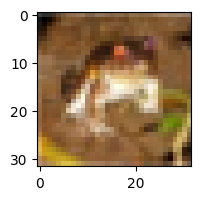

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[0])

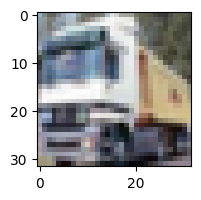

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[1])

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
Y_train = y_train.reshape(-1,)

In [ ]:
Y_test = y_test.reshape(-1,)

In [ ]:
Y_train.shape

(50000,)

In [ ]:
Y_train[:3]

array([6, 9, 9], dtype=uint8)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
Y_train[0]

6

In [ ]:
def plot_figure(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

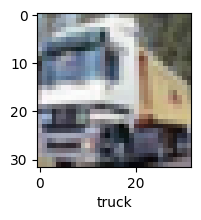

In [ ]:
plot_figure(x_train,Y_train,1)

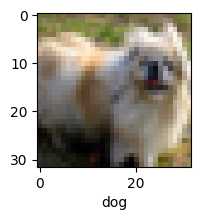

In [ ]:
plot_figure(x_train,Y_train,40)

In [ ]:
x_train.max()

255

In [ ]:
X_train = x_train /255
X_test = x_test/255

Building simple ANN for image classification

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
32*32*3

3072

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000,activation = 'relu'),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid'),
    ])

model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(X_train,Y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 190s 121ms/step - loss: 1.8111 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 188s 120ms/step - loss: 1.6231 - accuracy: 0.4294
Epoch 3/5
1563/1563 [==============================] - 197s 126ms/step - loss: 1.5401 - accuracy: 0.4578
Epoch 4/5
1563/1563 [==============================] - 189s 121ms/step - loss: 1.4812 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 186s 119ms/step - loss: 1.4319 - accuracy: 0.4969


In [ ]:
ann = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000,activation = 'relu'),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid'),
    ])

ann.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
ann.fit(X_train,Y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 440s 281ms/step - loss: 1.8963 - accuracy: 0.3259
Epoch 2/5
1563/1563 [==============================] - 446s 286ms/step - loss: 1.6593 - accuracy: 0.4062
Epoch 3/5
1563/1563 [==============================] - 422s 270ms/step - loss: 1.5734 - accuracy: 0.4359
Epoch 4/5
1563/1563 [==============================] - 440s 282ms/step - loss: 1.5267 - accuracy: 0.4545
Epoch 5/5
1563/1563 [==============================] - 448s 287ms/step - loss: 1.4865 - accuracy: 0.4684


In [ ]:
ann.evaluate(X_test,Y_test)

313/313 [==============================] - 18s 55ms/step - loss: 1.5018 - accuracy: 0.4677


[1.5017614364624023, 0.4677000045776367]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = ann.predict(X_test)

313/313 [==============================] - 17s 53ms/step


In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
np.argmax(y_pred[0])

3

In [ ]:
Y_test[0]

3

In [ ]:
y_pred = [np.argmax(i) for i in y_pred]

In [ ]:
y_pred[:5]

[3, 9, 0, 0, 4]

In [ ]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.66      0.54      1000
           1       0.57      0.59      0.58      1000
           2       0.45      0.22      0.29      1000
           3       0.35      0.36      0.35      1000
           4       0.41      0.39      0.40      1000
           5       0.42      0.30      0.35      1000
           6       0.52      0.48      0.50      1000
           7       0.43      0.64      0.51      1000
           8       0.68      0.47      0.56      1000
           9       0.46      0.58      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



## Let's build the convolution neural network

In [ ]:
cnn = keras.models.Sequential([
    #cnn
    tf.keras.layers.Conv2D(filters=32,kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)), #the filer size is no. of filters(no. of features detected),kernel_size is size of each filter
    keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64,kernel_size = (3,3),activation = 'relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')

])

In [ ]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
cnn.fit(X_train,Y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 85s 53ms/step - loss: 1.4325 - accuracy: 0.4867
Epoch 2/5
1563/1563 [==============================] - 84s 53ms/step - loss: 1.0804 - accuracy: 0.6238
Epoch 3/5
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9479 - accuracy: 0.6709
Epoch 4/5
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8602 - accuracy: 0.7005
Epoch 5/5
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7920 - accuracy: 0.7238


In [ ]:
cnn.evaluate(X_test,Y_test)
y_preds = cnn.predict(X_test)

313/313 [==============================] - 11s 35ms/step


In [ ]:
y_preds = [np.argmax(i) for i in y_preds]
y_preds[:5]

[3, 8, 8, 0, 6]

In [ ]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73      1000
           1       0.80      0.83      0.81      1000
           2       0.53      0.64      0.58      1000
           3       0.55      0.45      0.49      1000
           4       0.64      0.68      0.66      1000
           5       0.73      0.47      0.57      1000
           6       0.76      0.76      0.76      1000
           7       0.72      0.78      0.75      1000
           8       0.82      0.76      0.79      1000
           9       0.79      0.78      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

